In [0]:
import pandas as pd
import numpy as np


**Montando tabela dos discentes**

In [3]:
url_discentes = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv"
discentes = pd.read_csv(url_discentes, sep=';')
dados_discentes = discentes[['sexo', 'raca', 'tipo_discente', 'status', 'sigla_nivel_ensino', 'nome_curso', 'id_curso']]
dados_discentes = dados_discentes[(dados_discentes['status'] == 'ATIVO') & (dados_discentes['sigla_nivel_ensino'] == 'G')]
dados_discentes.head()

,sexo,raca,tipo_discente,status,sigla_nivel_ensino,nome_curso,id_curso
1,M,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0
2,M,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0
5,F,Pardo,REGULAR,ATIVO,G,SAÚDE COLETIVA,7252420.0
6,F,Pardo,REGULAR,ATIVO,G,FARMÁCIA,2000039.0
8,M,Branco,REGULAR,ATIVO,G,MATEMÁTICA,111635066.0


**Montando tabela dos cursos e áreas**

In [4]:
url_cursos = "http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv"
cursos = pd.read_csv(url_cursos, sep=';')
dados_cursos = cursos[['nome', 'nivel_ensino', 'area_conhecimento', 'id_curso']]
dados_cursos = dados_cursos[(dados_cursos['nivel_ensino'] == 'GRADUAÇÃO')]
dados_cursos.head()

,nome,nivel_ensino,area_conhecimento,id_curso
0,ADMINISTRAÇÃO,GRADUAÇÃO,Ciências Sociais Aplicadas,2000002
1,ADMINISTRAÇÃO PÚBLICA,GRADUAÇÃO,Ciências Sociais Aplicadas,15315770
2,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,GRADUAÇÃO,Outra,94598200
3,ARQUITETURA E URBANISMO,GRADUAÇÃO,Engenharias,2000005
4,ARTES VISUAIS,GRADUAÇÃO,"Linguística, Letras e Artes",2000123


**Relação de raça/cor nos cursos**

In [5]:
discentes_cursos = pd.merge(left=dados_discentes, right=dados_cursos, on='id_curso')
discentes_cursos.head()

,sexo,raca,tipo_discente,status,sigla_nivel_ensino,nome_curso,id_curso,nome,nivel_ensino,area_conhecimento
0,M,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0,HISTÓRIA,GRADUAÇÃO,Ciências Humanas
1,M,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0,HISTÓRIA,GRADUAÇÃO,Ciências Humanas
2,M,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0,HISTÓRIA,GRADUAÇÃO,Ciências Humanas
3,F,Pardo,REGULAR,ATIVO,G,HISTÓRIA,111635060.0,HISTÓRIA,GRADUAÇÃO,Ciências Humanas
4,M,Branco,REGULAR,ATIVO,G,HISTÓRIA,111635060.0,HISTÓRIA,GRADUAÇÃO,Ciências Humanas


In [135]:
cor_por_curso = pd.pivot_table(discentes_cursos, values='nome_curso', index=['id_curso'],                    
            columns=['raca'], aggfunc=lambda x: len(x), fill_value=0)
cor_por_curso.columns = cor_por_curso.columns.str.lower()
names = {
    "amarelo (de origem oriental)": "amarelo",
    "indígeno": "indigeno",
    "não informado": "nao_informado"
}
cor_por_curso = cor_por_curso.rename(columns=names)
cor_por_curso.head()

raca,amarelo,branco,indigeno,negro,nao_informado,pardo
id_curso,,,,,,
2000002.0,1,54,1,9,1,43
2000005.0,0,13,0,1,0,7
2000006.0,0,17,0,4,3,14
2000009.0,0,10,0,3,1,8
2000011.0,0,42,0,3,1,47


In [136]:
dist_cursos_2019 = dados_cursos.set_index('id_curso')
total_racas = cor_por_curso.sum(axis='columns')

for raca in cor_por_curso.columns:
  dist_cursos_2019[raca] = cor_por_curso[raca]
  dist_cursos_2019[raca+'_no_curso(%)'] = (cor_por_curso[raca] / total_racas) * 100
  dist_cursos_2019[raca+'_no_curso(%)'] = dist_cursos_2019[raca+'_no_curso(%)'].fillna(0)
  dist_cursos_2019[raca+'_no_curso(%)'] = list(map(int, dist_cursos_2019[raca+'_no_curso(%)']))

remover = dist_cursos_2019.loc[(dist_cursos_2019["amarelo_no_curso(%)"] == 0) & 
                               (dist_cursos_2019["branco_no_curso(%)"]==0) & 
                               (dist_cursos_2019["indigeno_no_curso(%)"]==0) & 
                               (dist_cursos_2019["negro_no_curso(%)"]==0) & 
                               (dist_cursos_2019["nao_informado_no_curso(%)"]==0) & 
                               (dist_cursos_2019["pardo_no_curso(%)"]==0), 'nome']
dist_cursos_2019 = dist_cursos_2019.drop(remover.index)
dist_cursos_2019.head()

,nome,nivel_ensino,area_conhecimento,amarelo,amarelo_no_curso(%),branco,branco_no_curso(%),indigeno,indigeno_no_curso(%),negro,negro_no_curso(%),nao_informado,nao_informado_no_curso(%),pardo,pardo_no_curso(%)
id_curso,,,,,,,,,,,,,,,
2000002,ADMINISTRAÇÃO,GRADUAÇÃO,Ciências Sociais Aplicadas,1.0,0,54.0,49,1.0,0,9.0,8,1.0,0,43.0,39
15315770,ADMINISTRAÇÃO PÚBLICA,GRADUAÇÃO,Ciências Sociais Aplicadas,0.0,0,1.0,100,0.0,0,0.0,0,0.0,0,0.0,0
94598200,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,GRADUAÇÃO,Outra,0.0,0,12.0,28,0.0,0,2.0,4,3.0,7,25.0,59
2000005,ARQUITETURA E URBANISMO,GRADUAÇÃO,Engenharias,0.0,0,13.0,61,0.0,0,1.0,4,0.0,0,7.0,33
2000123,ARTES VISUAIS,GRADUAÇÃO,"Linguística, Letras e Artes",1.0,2,23.0,52,0.0,0,4.0,9,0.0,0,16.0,36


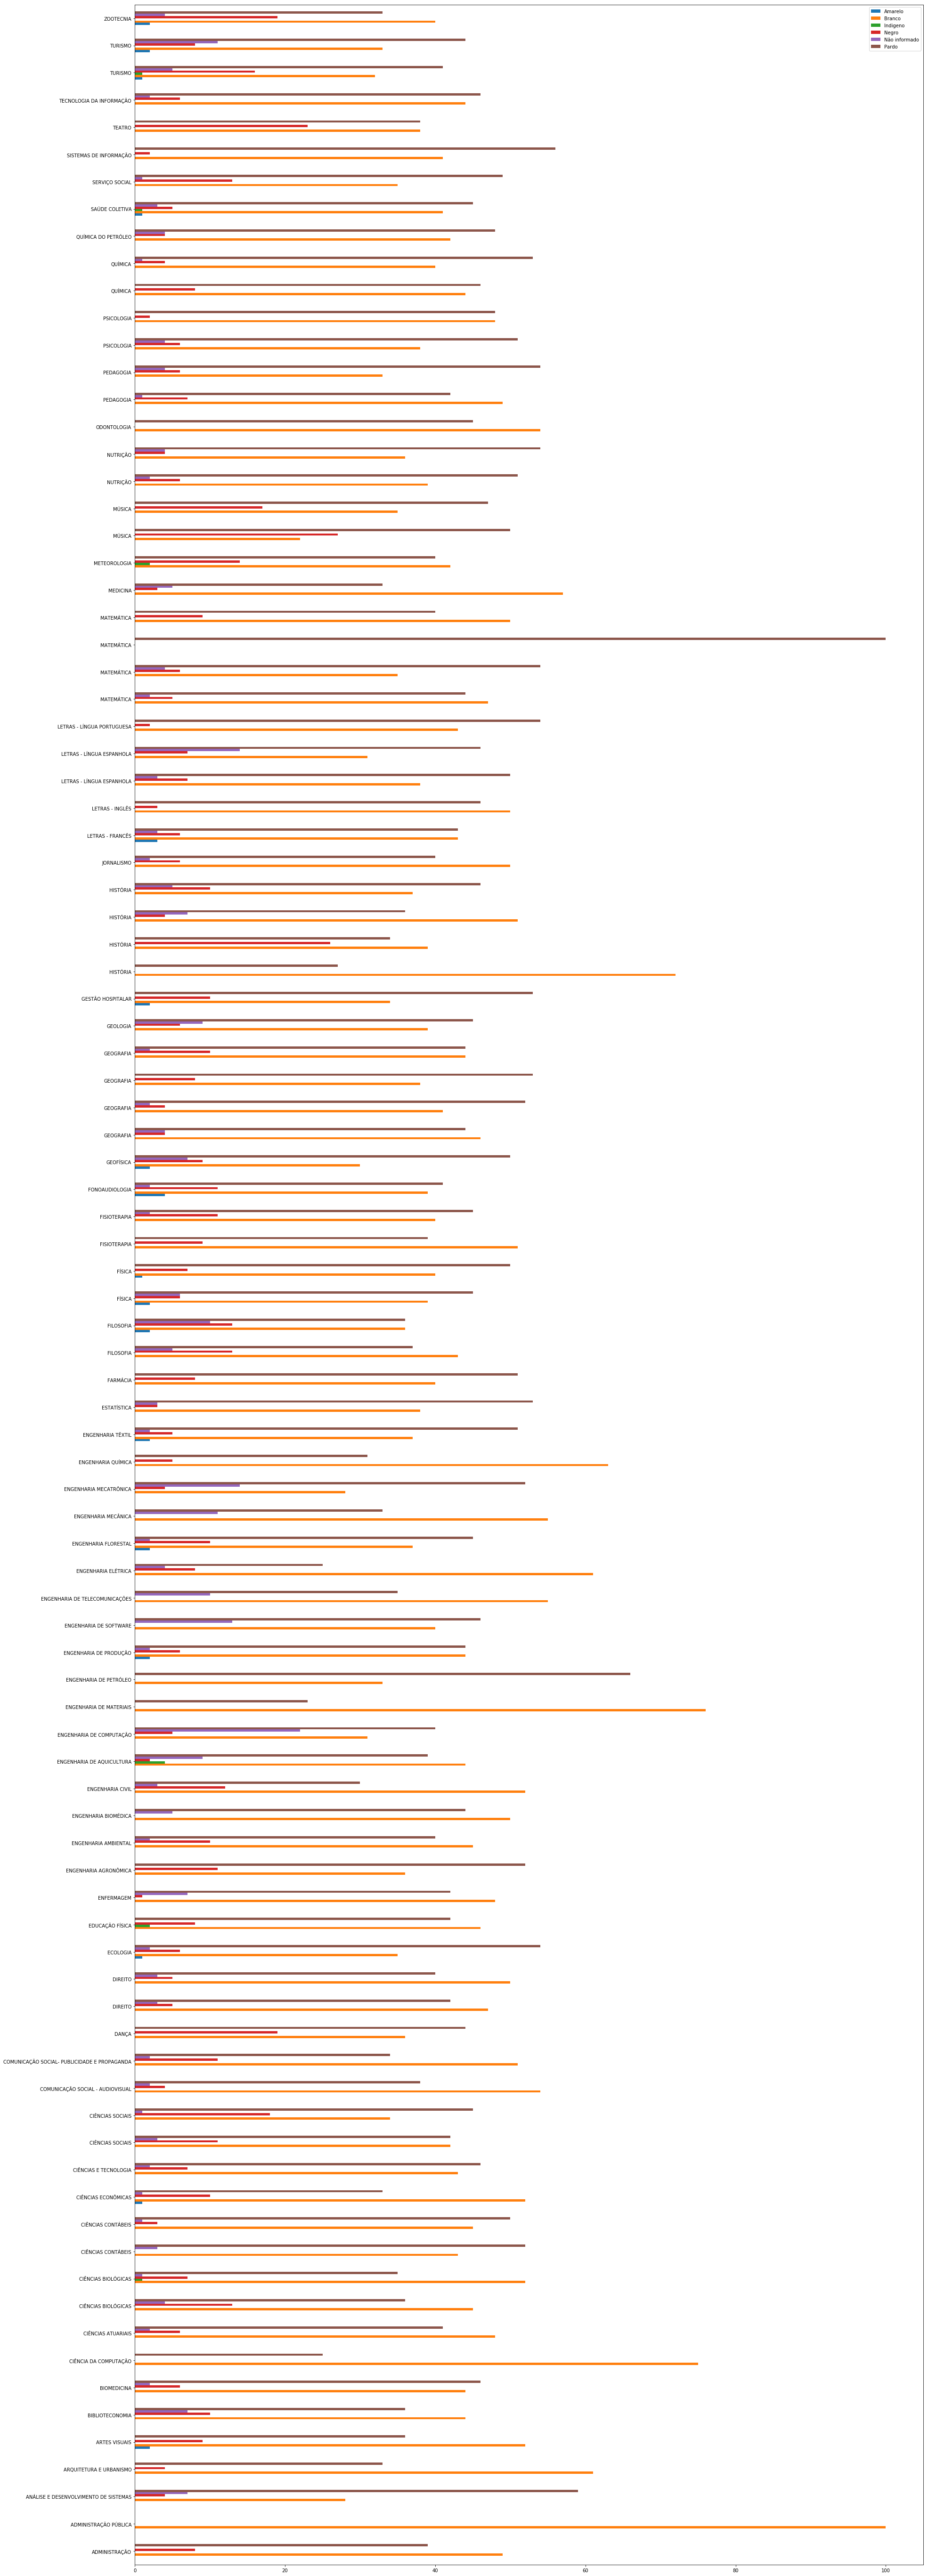

In [137]:
amarelo = dist_cursos_2019["amarelo_no_curso(%)"].values
branco = dist_cursos_2019["branco_no_curso(%)"].values
indigeno = dist_cursos_2019["indigeno_no_curso(%)"].values
negro = dist_cursos_2019["negro_no_curso(%)"].values
nao_informado = dist_cursos_2019["nao_informado_no_curso(%)"].values
pardo = dist_cursos_2019["pardo_no_curso(%)"].values

index = dist_cursos_2019["nome"].values

df = pd.DataFrame({'Amarelo': amarelo, 'Branco': branco, 
                   'Indigeno': indigeno, 'Negro': negro, 
                   'Não informado': nao_informado, 'Pardo': pardo}, index=index)
ax = df.plot.barh(figsize=(30, 100))

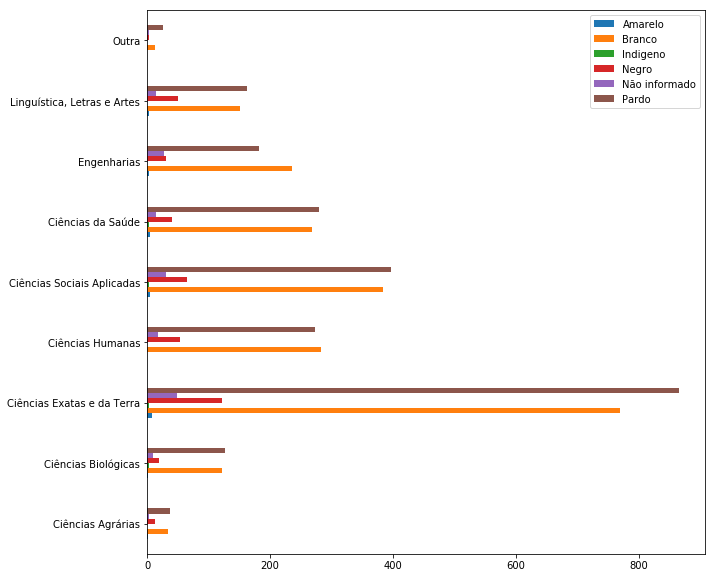

In [140]:
dados_2019 = dist_cursos_2019.groupby('area_conhecimento').sum().reset_index()
dados_2019["amarelo_no_curso(%)"] = dados_2019["amarelo"]
dados_2019["branco_no_curso(%)"] = dados_2019["branco"]
dados_2019["indigeno_no_curso(%)"] = dados_2019["indigeno"]
dados_2019["negro_no_curso(%)"] = dados_2019["negro"]
dados_2019["nao_informado_no_curso(%)"] = dados_2019["nao_informado"]
dados_2019["pardo_no_curso(%)"] = dados_2019["pardo"]

amarelo = dados_2019["amarelo_no_curso(%)"].values
branco = dados_2019["branco_no_curso(%)"].values
indigeno = dados_2019["indigeno_no_curso(%)"].values
negro = dados_2019["negro_no_curso(%)"].values
nao_informado = dados_2019["nao_informado_no_curso(%)"].values
pardo = dados_2019["pardo_no_curso(%)"].values

index = dados_2019["area_conhecimento"].values

df = pd.DataFrame({'Amarelo': amarelo, 'Branco': branco, 
                   'Indigeno': indigeno, 'Negro': negro, 
                   'Não informado': nao_informado, 'Pardo': pardo}, index=index)
ax = df.plot.barh(figsize=(10, 10))